In [16]:
#List of lakes Time series for Argentina

# import necessary libraries
import pandas as pd
import os
import glob
  
  
# use glob to get all the csv files
# in the folder
#path = os.getcwd()
dir_name="C:/Users/amgomez/Dropbox/Research/LOCSS/other_lakes/Argentine"


csv_files = glob.glob(os.path.join(dir_name, "*.xlsx"))
  
  
# loop over the list of csv files
df_argentina=pd.DataFrame()

for f in csv_files:
    
    # read the csv file
    df = pd.read_excel(f, skiprows=1, parse_dates=['Fecha y Hora'])
    df.columns=['date','height']  
    df['gauge_id']=f.split("\\")[-1].split(' ')[-1][:4]
    # print the location and filename
    #print('Location:', f)
    #print('File Name:', f.split("\\")[-1])
    #print('station id:', f.split("\\")[-1].split(' ')[-1][:4])
      
    # print the content
    #print('Content:')
    #display(df.head(2))
    df_argentina=df_argentina.append(df)
    #print()

df_argentina.shape


(12, 26)

In [55]:
#List of lakes with orbits in Argentina and Filter the big df

df_lakes_in_orbit=pd.read_csv('../data/gauge_lake_dates_area_20220202.csv')
df_lakes_in_orbit_AR=df_lakes_in_orbit.loc[df_lakes_in_orbit['Source']=='ARNHN']
df_lakes_in_orbit_AR.shape
df_AR_ts=df_argentina.loc[df_argentina['gauge_id'].isin(df_lakes_in_orbit_AR['Gauge ID'])]
df_AR_ts=pd.merge(df_AR_ts, df_lakes_in_orbit_AR[['Gauge ID','Hylak_id']], left_on='gauge_id', right_on='Gauge ID', how='left').drop('Gauge ID', axis=1)

In [57]:
df_lakes_in_orbit_AR[['Hylak_id', 'Gauge ID']]
#df_AR_ts.loc[df_AR_ts['gauge_id']=='2028']

#df_AR_ts

,Hylak_id,Gauge ID
0,10597,1819
1,10602,2231
2,2832,2832
3,123100,1805
4,123110,1830
5,123100,2300
6,10663,2830
7,10582,2028
8,10582,2102
9,10626,2316


In [58]:
df_AR_ts.loc[df_AR_ts['gauge_id']=='2028'].to_csv('../data/sample_gauges_val_20220203.csv', index=False)

In [32]:
df_lakes_in_orbit_AR.loc[~df_lakes_in_orbit_AR['Gauge ID'].isin(df_argentina['gauge_id'])]['Gauge ID'].unique()

array(['1805', '2102'], dtype=object)

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

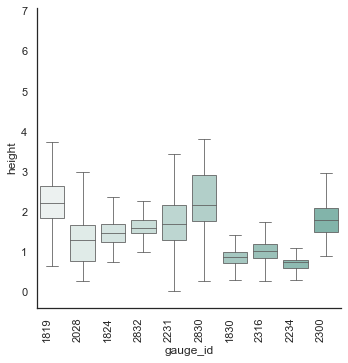

In [36]:
#%% #Plot PRI_ab test by season
sns.set_style('white')
sns.set_context('notebook')#, font_scale=1.5)
palette=sns.color_palette("light:#5A9", 13)

df=df_AR_ts.copy()

# df=df[(df['year_month']!='2020-09')|(df['year_month']!='2020-08')]
# # df=df[(df['hour']<17)&(df['hour']>6)]

x_field='gauge_id'
y_field='height'
hue_field='gauge_id'
#facet_c='Country_State'
kind_plot='box'

#kind_plot='line'
#x_axis_name='Hour'
#y_axis_name='PRI_ab'
#ylim=[0,1]
#df=df.loc[(df[y_field]<10) & (df[y_field]>=0)]


g_n=sns.catplot(data=df,x=x_field,y=y_field,
                #hue=hue_field,
                legend=True, legend_out=True, fliersize=0, linewidth=0.8,
                palette=palette,#whis=whis,
                kind=kind_plot)#, 
                #col_wrap=3,
                #col=facet_c, sharex=False, sharey=False, dodge=False)#, #col_order=facet_c_order,#col_wrap=4,
                 # order=hue_order,margin_titles=True
                 #row=facet_r,row_order=facet_r_order,
                #aspect=.9, dodge=False)#, height=height)
g_n.set_xticklabels(rotation=90, horizontalalignment='right')
plt.show()
del df

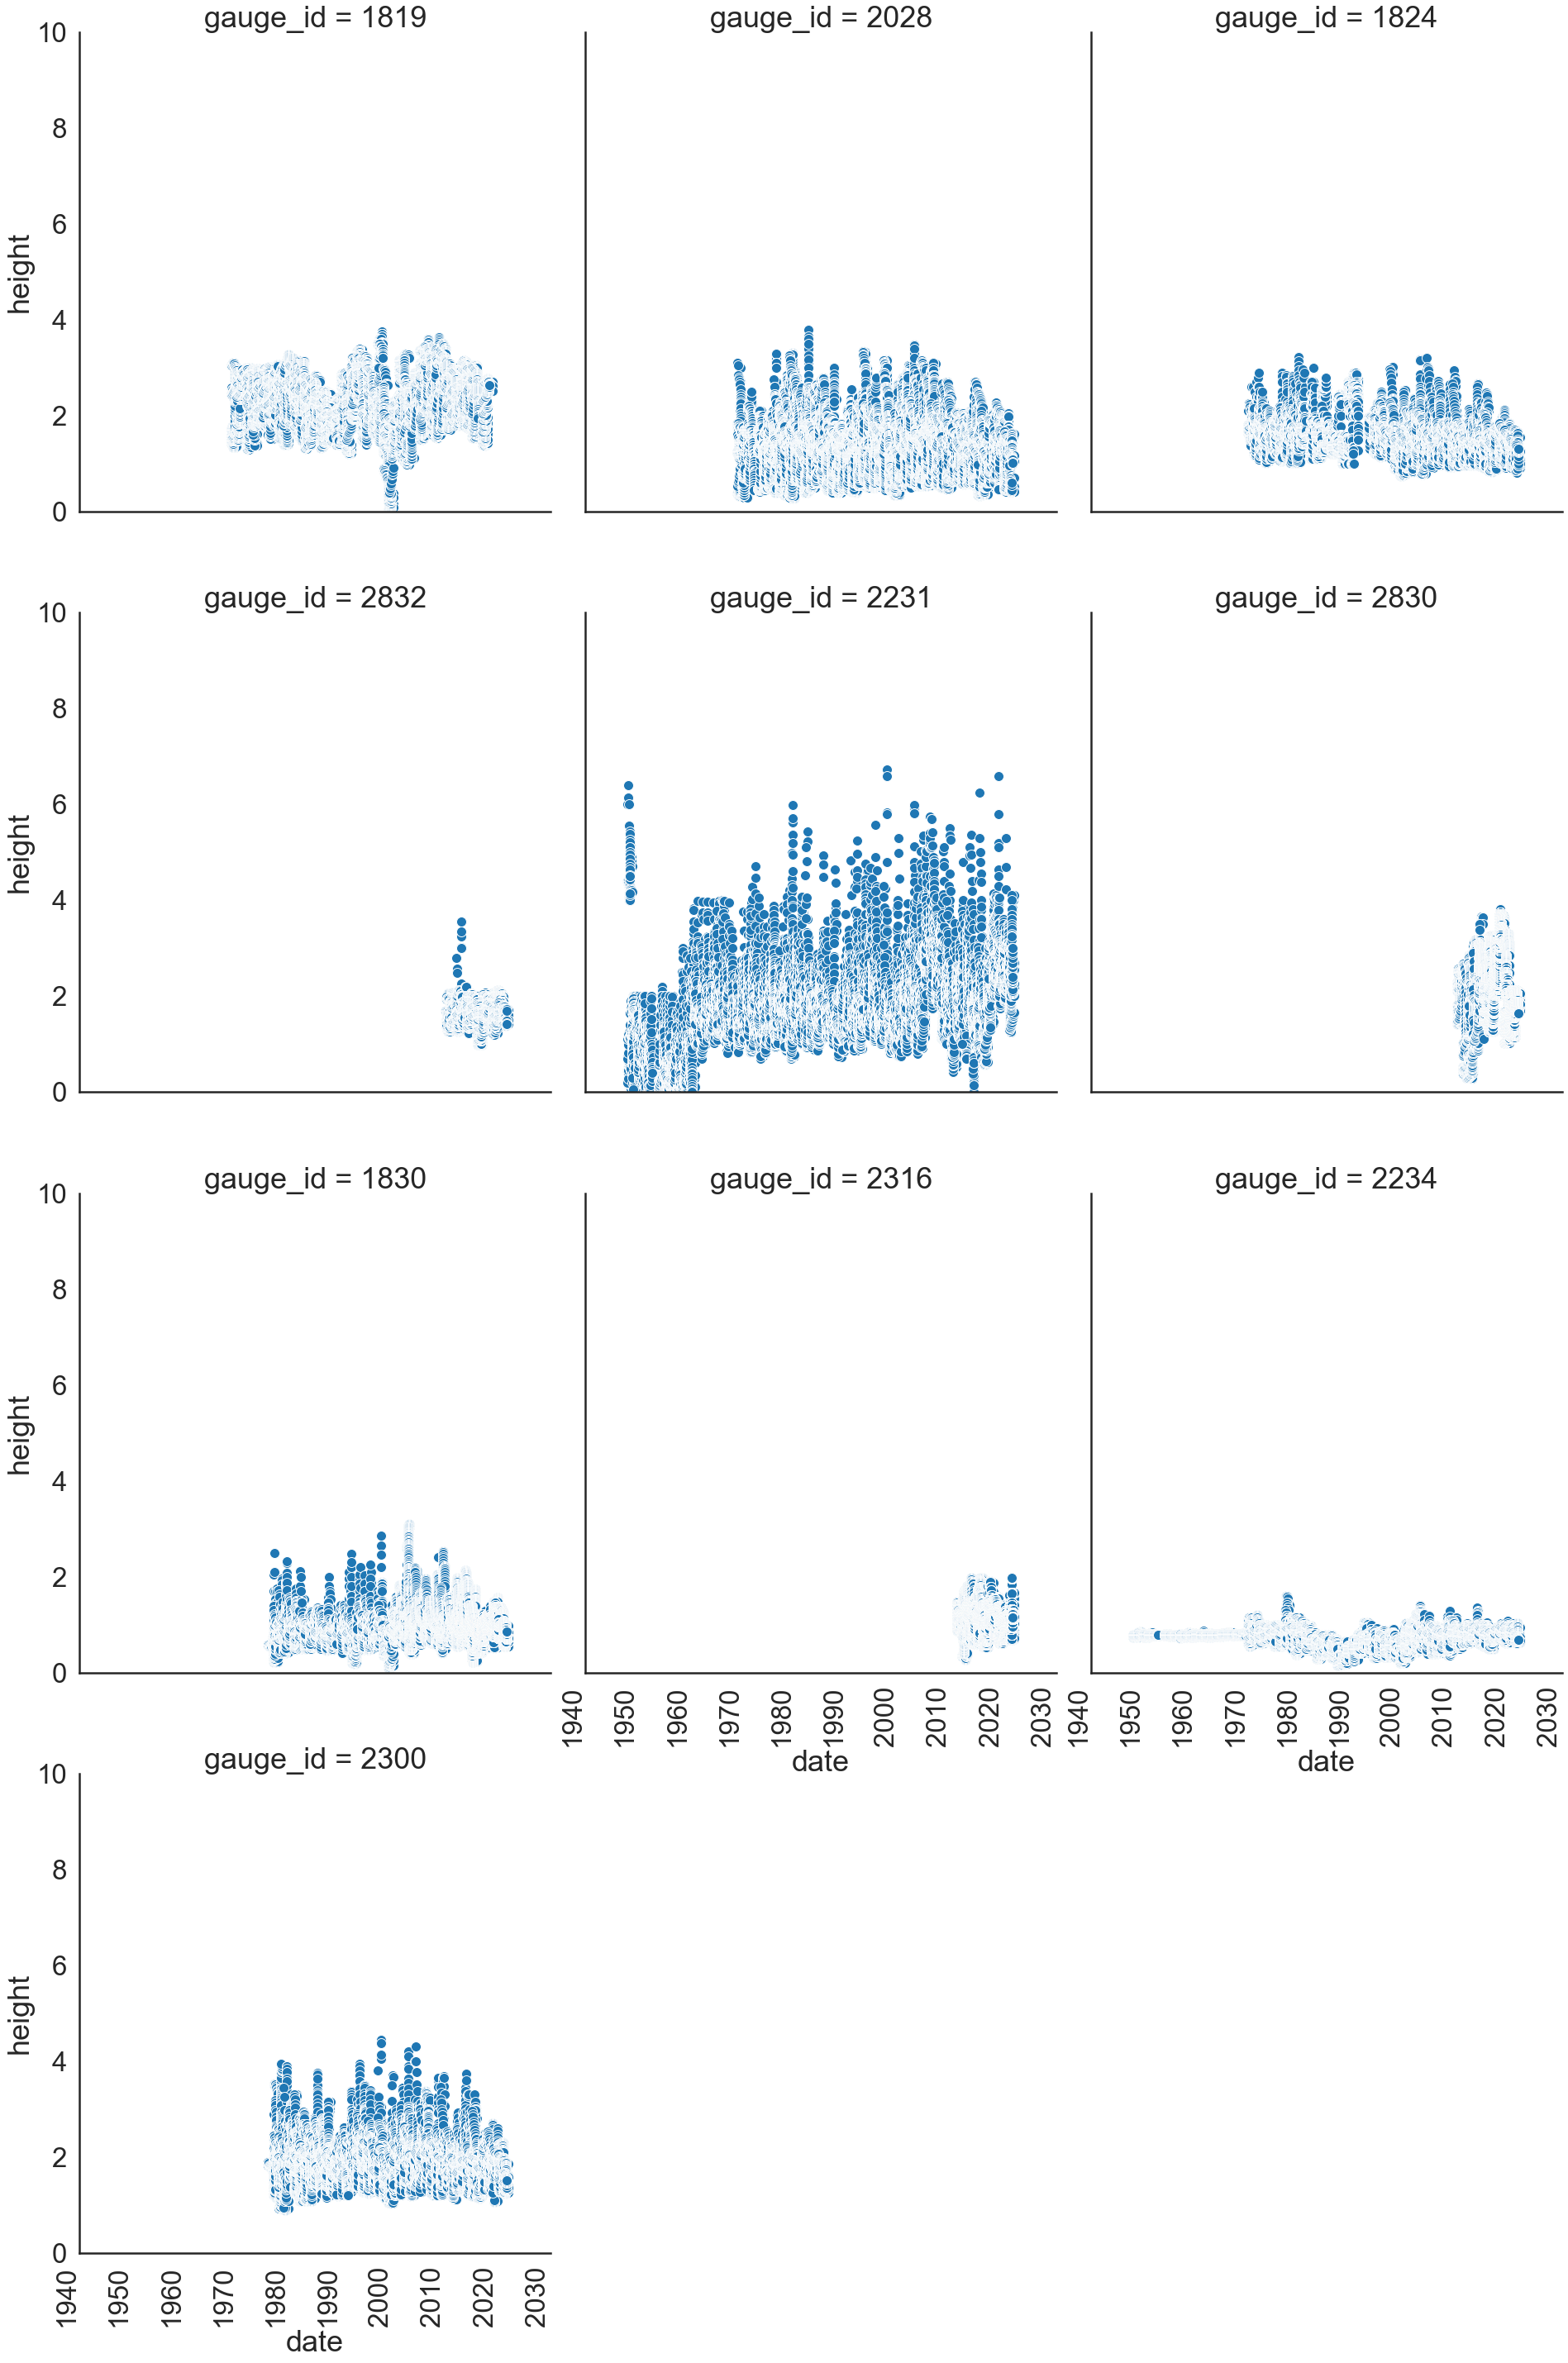

In [49]:
sns.set_style('white')
sns.set_context('poster', font_scale=1.5)
df=df_AR_ts.copy()
facet_c='gauge_id'
x_field='date'
y_field='height'
y_lim=[0,10]
kind_plot='line'
g_n=sns.relplot(data=df,x=x_field,y=y_field,#hue=hue,
             #legend=True, color=palette,
             #kind=kind_plot,
             col_wrap=3,
             col=facet_c,# col_order=facet_c_order,
             #row=facet_r,row_order=facet_r_order,
             aspect=.9,
             height=10)
g_n.set_xticklabels(rotation=90, horizontalalignment='right')
plt.ylim(y_lim[0],y_lim[1])

plt.show()

